In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [2]:
def perform_eda(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Report and remove duplicates
    print(f"Number of duplicates in {file_path}: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    
    # Report missing values, then remove them
    missing_values = df.isnull().sum()
    print(f"Missing values in {file_path}:\n{missing_values[missing_values > 0]}")
    df.dropna(inplace=True)
    
    # Display descriptive statistics
    print(df.describe())
    
    # Convert 'created_utc' to datetime and set as index
    df['created_utc'] = pd.to_datetime(df['created_utc'])
    df.set_index('created_utc', inplace=True)
    
    # Find and print the date range
    earliest_date = df.index.min()
    latest_date = df.index.max()
    print(f"Data covers from {earliest_date} to {latest_date}")
    
    # Resample and count posts per month
    monthly_posts = df.resample('M').size()
    
    # Plotting monthly posts
    plt.figure(figsize=(10, 6))
    monthly_posts.plot(title=f'Monthly Posts for {file_path}')
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.show()
    
    # Generate and display a word cloud
    text = ' '.join(title for title in df['title'])
    wordcloud = WordCloud(background_color='white', max_words=100, contour_color='steelblue').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
    # Return the cleaned DataFrame and the monthly post counts
    return df, monthly_posts




Number of duplicates in Datasets/ptsd.csv: 0
Missing values in Datasets/ptsd.csv:
body    180
dtype: int64
       num_comments         score  upvote_ratio
count  23848.000000  23848.000000  23848.000000
mean       5.471570     12.543442      0.929517
std       11.627359     32.938236      0.127500
min        0.000000      0.000000      0.100000
25%        0.000000      1.000000      0.900000
50%        2.000000      3.000000      1.000000
75%        6.000000      8.000000      1.000000
max      380.000000    896.000000      1.000000
Data covers from 2019-07-07 16:21:24+00:00 to 2021-12-23 17:08:28+00:00


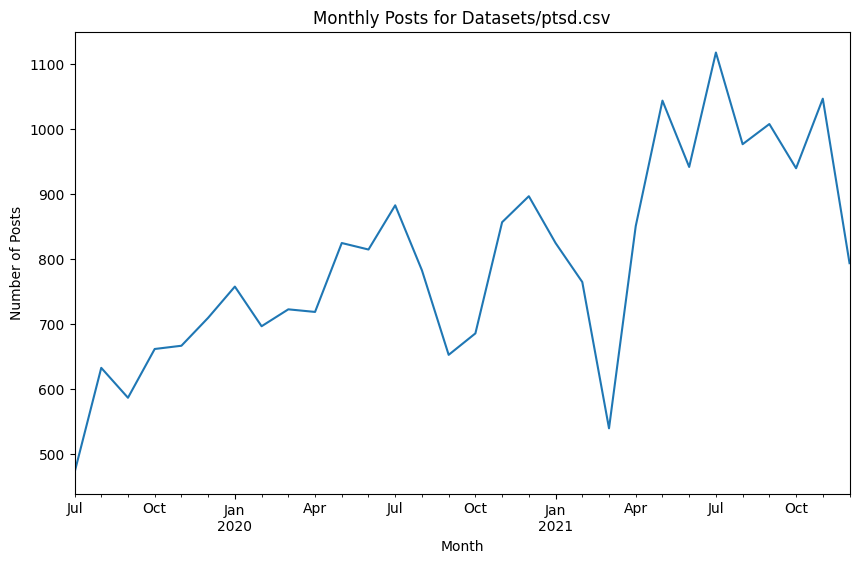

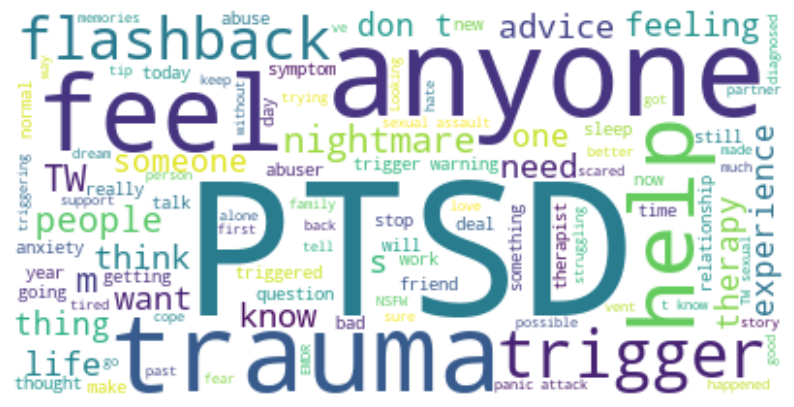

In [3]:
cleaned_ptsd_df, monthly_posts = perform_eda("Datasets/ptsd.csv")


Number of duplicates in Datasets/aspergers.csv: 0
Missing values in Datasets/aspergers.csv:
body    686
dtype: int64
       num_comments         score  upvote_ratio
count  22608.000000  22608.000000  22608.000000
mean      12.438606     27.755927      0.895855
std       26.498390     86.717430      0.146427
min        0.000000      0.000000      0.050000
25%        1.000000      1.000000      0.840000
50%        5.000000      5.000000      0.960000
75%       12.000000     14.000000      1.000000
max      560.000000   2380.000000      1.000000
Data covers from 2021-01-11 22:23:19+00:00 to 2021-12-23 17:56:36+00:00


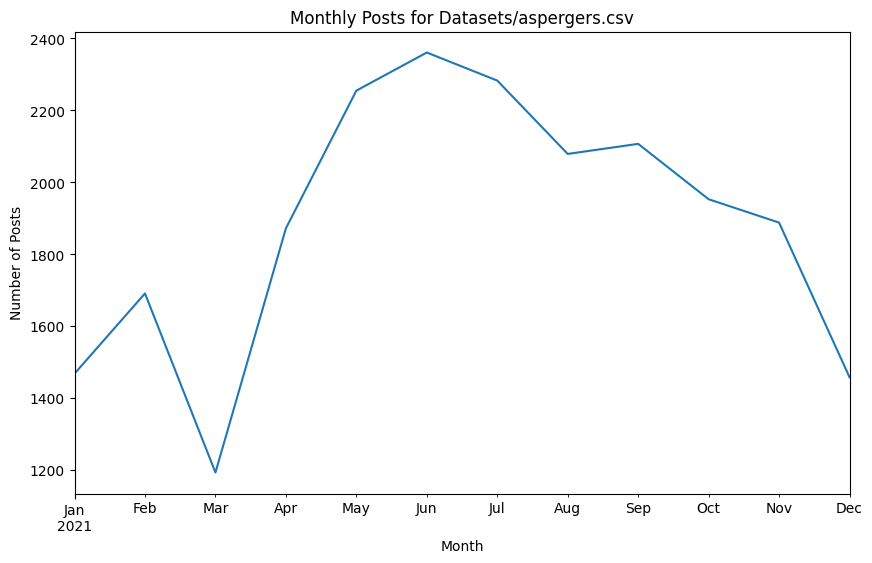

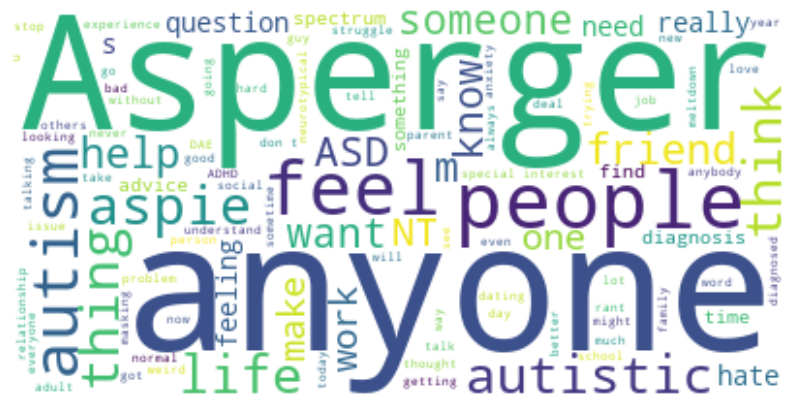

In [4]:
cleaned_apg_df, monthly_posts = perform_eda("Datasets/aspergers.csv")

Number of duplicates in Datasets/depression.csv: 0
Missing values in Datasets/depression.csv:
Series([], dtype: int64)
       num_comments         score  upvote_ratio
count  24031.000000  24031.000000  24031.000000
mean       2.741958      8.830219      0.950124
std       10.652513     56.456414      0.116446
min        0.000000      0.000000      0.140000
25%        0.000000      1.000000      0.990000
50%        1.000000      2.000000      1.000000
75%        2.000000      3.000000      1.000000
max      362.000000   2495.000000      1.000000
Data covers from 2021-11-06 21:02:17+00:00 to 2021-12-23 18:01:41+00:00


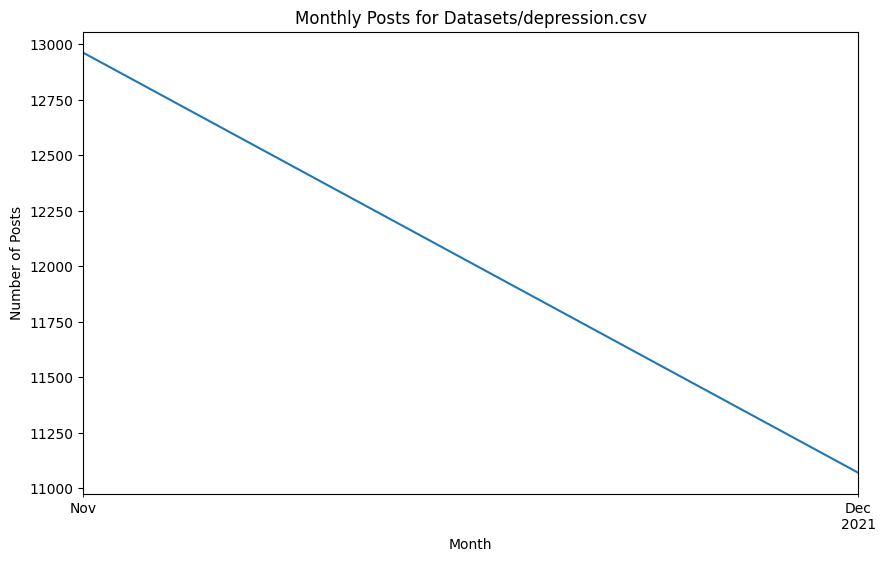

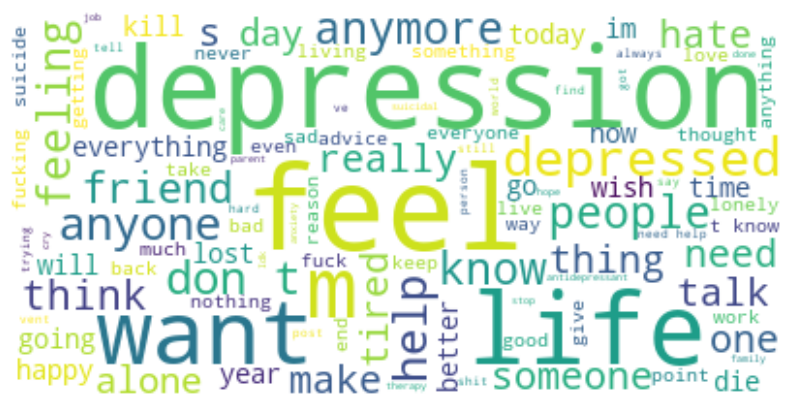

In [5]:
cleaned_dps_df, monthly_posts = perform_eda("Datasets/depression.csv")

Number of duplicates in Datasets/ocd.csv: 0
Missing values in Datasets/ocd.csv:
body    743
dtype: int64
       num_comments         score  upvote_ratio
count  42083.000000  42083.000000  42083.000000
mean       3.950289      8.627783      0.956377
std        9.593645     37.260117      0.107818
min        0.000000      0.000000      0.110000
25%        0.000000      1.000000      1.000000
50%        2.000000      2.000000      1.000000
75%        4.000000      5.000000      1.000000
max      466.000000   1054.000000      1.000000
Data covers from 2021-02-16 02:32:47+00:00 to 2021-12-22 18:26:02+00:00


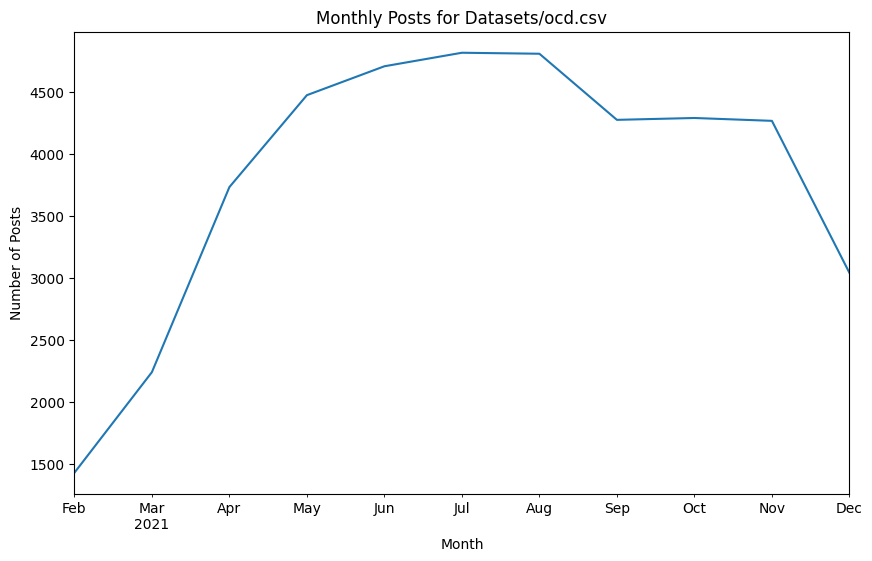

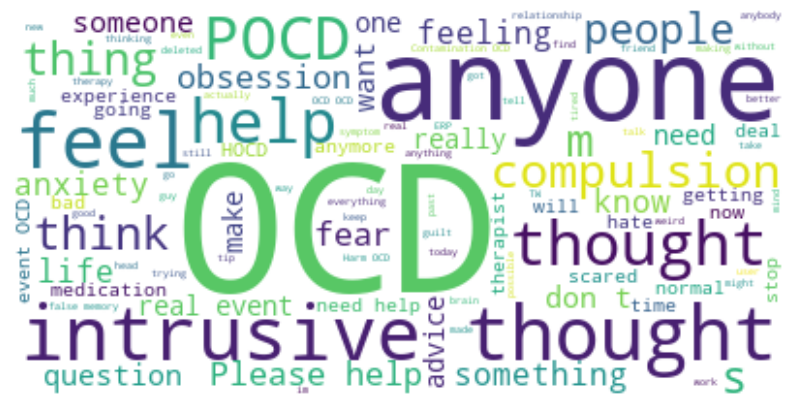

In [6]:
cleaned_ocd_df, monthly_posts = perform_eda("Datasets/ocd.csv")

Number of duplicates in Datasets/adhd.csv: 0
Missing values in Datasets/adhd.csv:
Series([], dtype: int64)
       num_comments         score  upvote_ratio
count  37109.000000  37109.000000  37109.000000
mean       9.709154     26.799698      0.948083
std       53.912100    201.767538      0.126283
min        0.000000      0.000000      0.080000
25%        1.000000      1.000000      1.000000
50%        2.000000      1.000000      1.000000
75%        5.000000      4.000000      1.000000
max     2944.000000   6055.000000      1.000000
Data covers from 2021-10-01 20:28:11+00:00 to 2021-12-22 18:32:56+00:00


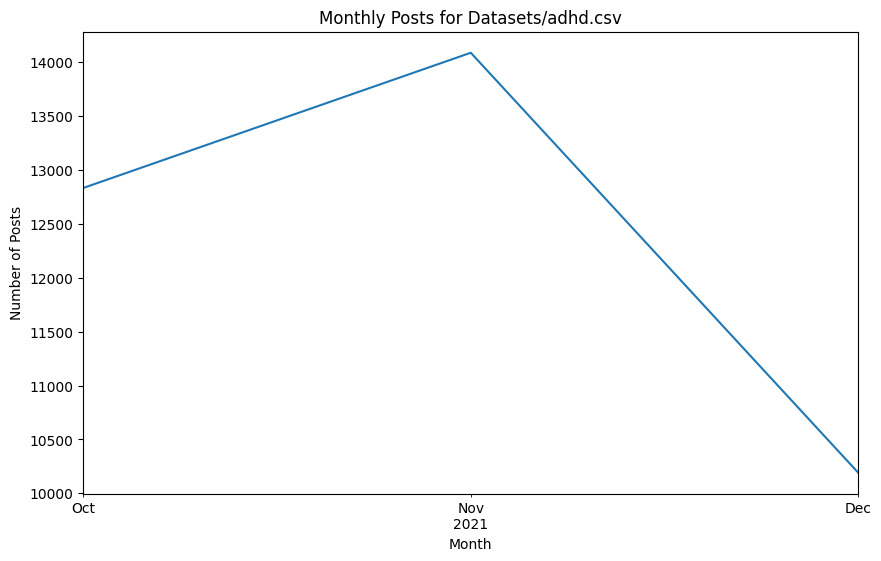

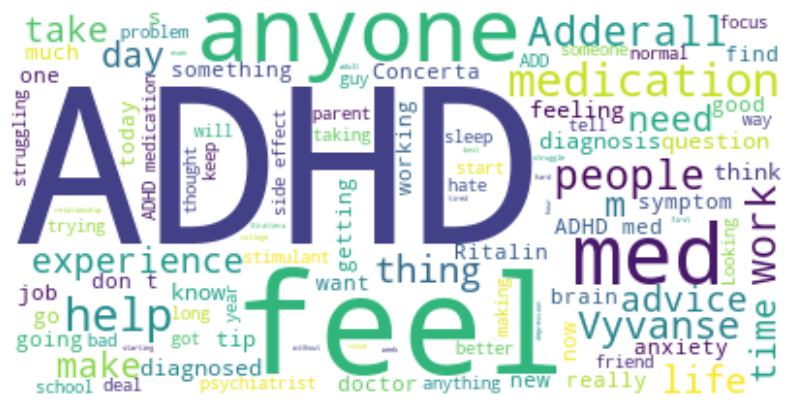

In [7]:
cleaned_adhd_df, monthly_posts = perform_eda("Datasets/adhd.csv")

In [8]:
cleaned_ptsd_df.head(1)

,author,body,id,num_comments,score,subreddit,title,upvote_ratio,url
created_utc,,,,,,,,,
2021-12-23 17:08:28+00:00,ChanceIntroduction95,This year felt like literal hell. It’s over no...,rn07cg,3,5,ptsd,How to deal with feeling shameful about how my...,1.0,https://www.reddit.com/r/ptsd/comments/rn07cg/...


In [9]:
cleaned_ptsd_df.shape


(23848, 9)

## Randomly sampling a subset of each data

In [10]:

sampled_ptsd_df = cleaned_ptsd_df.sample(n=10000, random_state=1)


In [11]:
sampled_apg_df = cleaned_apg_df.sample(n=10000, random_state=1)
sampled_dps_df = cleaned_dps_df.sample(n=10000, random_state=1)
sampled_ocd_df = cleaned_ocd_df.sample(n=10000, random_state=1)
sampled_adhd_df = cleaned_adhd_df.sample(n=10000, random_state=1)

Based on the comparisons of the descriptive statistics between the original datasets and their respective sampled subsets, it's clear that the sampled datasets maintain the key characteristics and diversity of the original datasets. This ensures that the samples are representative and suitable for conducting my engagement analysis.

### Save all sampled datasets to the designed folder 

In [17]:

folder_path = 'Engagement Analysis Datasets'


# Define a list of tuples containing DataFrame objects and their intended file names
datasets = [
    (sampled_ptsd_df, 'sampled_ptsd.csv'),
    (sampled_apg_df, 'sampled_apg.csv'),
    (sampled_dps_df, 'sampled_dps.csv'),
    (sampled_ocd_df, 'sampled_ocd.csv'),
    (sampled_adhd_df, 'sampled_adhd.csv')
]

# Loop through the datasets and save each one
for df, filename in datasets:
    df.to_csv(os.path.join(folder_path, filename), index=False)

# Combine the DataFrames
combined_df = pd.concat([df for df, _ in datasets])

# Save the combined DataFrame to a CSV file
combined_file_path = os.path.join(folder_path, 'combined_sampled_datasets.csv')
combined_df.to_csv(combined_file_path, index=False)





All datasets and the combined dataset have been saved to 'Engagement Analysis Datasets'


In [21]:
combined_df.head(1)

,author,body,id,num_comments,score,subreddit,title,upvote_ratio,url
created_utc,,,,,,,,,
2020-05-23 20:47:13+00:00,bijoubees,im a survivor of CSA and three other SAs. i wa...,gpcbyz,0,1,ptsd,triggered for the first time in almost a year ...,1.0,https://www.reddit.com/r/ptsd/comments/gpcbyz/...


### Explore various aspects of engagement

#### Engagement Over Time Analysis

Analyzing how engagement metrics like comments and scores vary over time across different subreddits.

In [28]:
## Resample data by Time period. 
## Thses five subreddit each with its own unique time range, so the resample approach will be based on the time spans


# PTSD: monthly resampling 
monthly_ptsd = sampled_ptsd_df.resample('M').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})

# Asperger,depression, OCD, ADHD: weekly resampling
weekly_apg = sampled_apg_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})
weekly_ocd = sampled_ocd_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})
weekly_adhd = sampled_adhd_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})
weekly_dps = sampled_dps_df.resample('W').agg({'num_comments': 'mean', 'score': 'mean', 'upvote_ratio': 'mean'})



In [29]:


# Define the base path where the files will be saved
base_path = "Engagement Analysis Datasets/Engagement 1"

# Check if the base path exists, if not, create it
if not os.path.exists(base_path):
    os.makedirs(base_path)

# Save each resampled dataset to a CSV file within the specified path
monthly_ptsd.to_csv(os.path.join(base_path, 'monthly_ptsd.csv'))
weekly_apg.to_csv(os.path.join(base_path, 'weekly_apg.csv'))
weekly_ocd.to_csv(os.path.join(base_path, 'weekly_ocd.csv'))
weekly_adhd.to_csv(os.path.join(base_path, 'weekly_adhd.csv'))
weekly_dps.to_csv(os.path.join(base_path, 'weekly_dps.csv'))




#### Interactive Scatter Plot and Bubble Chart for Community Interaction Analysis

Investigating the relationship between upvote ratios, comments, and scores to understand how different communities engage with content.

we use the combined_df and create interactive scatter plots. 

In [31]:
combined_df.head(1)

,author,body,id,num_comments,score,subreddit,title,upvote_ratio,url
created_utc,,,,,,,,,
2020-05-23 20:47:13+00:00,bijoubees,im a survivor of CSA and three other SAs. i wa...,gpcbyz,0,1,ptsd,triggered for the first time in almost a year ...,1.0,https://www.reddit.com/r/ptsd/comments/gpcbyz/...


#### Comparative Analysis

Compare engagement across different mental health conditions by aggregating metrics like num_comments, score, and upvote_ratio by subreddit.

In [32]:
## prepare data for comparative analysis

# calculating average engagement metrics by subreddit
avg_engagement_by_subreddit = combined_df.groupby('subreddit').agg({
    'num_comments': 'mean',
    'score': 'mean',
    'upvote_ratio': 'mean'
}).reset_index()


In [33]:
avg_engagement_by_subreddit.head()

,subreddit,num_comments,score,upvote_ratio
0,ADHD,9.9932,29.1073,0.949168
1,OCD,3.8012,8.2509,0.957139
2,aspergers,12.5547,27.6951,0.896976
3,depression,2.7132,8.9155,0.947313
4,ptsd,5.4404,12.6055,0.930441


#### Summary

Engagement Over Time Analysis: Line Chart


Community Interaction Analysis: Scatter Plots/Bubble Charts

Comparative Analysis: Bar Chart
 
 
